In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import ipywidgets as widgets
pd.set_option('display.max_rows', 999)

print('  - re=' + re.__version__)
print('  - numpy=' + np.__version__)
print('  - json=' + json.__version__)
print('  - requests=' + requests.__version__)
print('  - seaborn=' + sns.__version__)

In [3]:
clusters = pd.read_csv('../data/clusters_revised.csv')
clustersByType = pd.read_csv('../data/clusters_by_type.csv')
violations= pd.read_csv('../data/violations.csv')
zipcodes = gpd.read_file('../data/zipcodes.geojson')

In [4]:
zipcodes.head(2)

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."


In [5]:
clusters.head()

,Cluster Name,Facility Type,Cluster Start Date,# Cases,Latitude,Longitude
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.144703,-86.802655
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.844583
2,Religious Retreat,Social Gathering,3/25/2020,18,NaN,NaN
3,The Health Center at Richland Place,LTCF,4/3/2020,47,36.128750,-86.817345
4,Trevecca Center for Rehab and Healing,LTCF,4/4/2020,102,36.144562,-86.754560


In [6]:
clusters.columns = ['name', 'facilityType', 'clusterStartDate', 'caseCount','lat','long']

In [7]:
clusters.head()

,name,facilityType,clusterStartDate,caseCount,lat,long
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.144703,-86.802655
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.844583
2,Religious Retreat,Social Gathering,3/25/2020,18,NaN,NaN
3,The Health Center at Richland Place,LTCF,4/3/2020,47,36.128750,-86.817345
4,Trevecca Center for Rehab and Healing,LTCF,4/4/2020,102,36.144562,-86.754560


In [8]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              62 non-null     object 
 1   facilityType      62 non-null     object 
 2   clusterStartDate  62 non-null     object 
 3   caseCount         62 non-null     int64  
 4   lat               51 non-null     float64
 5   long              51 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.0+ KB


In [9]:
clustersByType.head(2)

,Cluster Type,Number of Clusters
0,Bar,7
1,Church,2


In [10]:
clustersByType.columns = ['clusterType', 'clusterCount']

In [11]:
clustersByType.head(2)

,clusterType,clusterCount
0,Bar,7
1,Church,2


In [12]:
clusters = clusters[clusters['lat'].isnull()==False]

In [13]:
clusters['category']= 'cluster'

In [14]:
violations.head(2)

,case_number,status,case_subrequest,case_origin,closed_when_created,incident_address,incident_city,incident_council_district,incident_zip_code,latitude,longitude,mapped_location,date_time_closed,contact_type,parent_case
0,497255,Assigned,COVID-19 Violations,Phone,False,440 McMurray Dr,NASHVILLE,27.0,37211.0,36.06190,-86.718060,"{'latitude': '36.0619', 'longitude': '-86.71806'}",NaN,NaN,NaN
1,497616,New,COVID-19 Violations,hubNashville Community,False,8027 E Lamar Alexander Pkwy,NaN,NaN,NaN,35.67977,-83.736708,"{'latitude': '35.67977', 'longitude': '-83.736...",NaN,NaN,NaN


In [15]:
violations = violations[violations['latitude'].isnull()==False]

In [16]:
violations['category']='violation'
violations['clusterStartDate'] = '1/1/1900'
violations['name'] = violations['incident_address']

In [17]:
violations.rename(columns = {"latitude":"lat", "longitude":"long"}, inplace=True)

In [18]:
violations.head(2)

,case_number,status,case_subrequest,case_origin,closed_when_created,incident_address,incident_city,incident_council_district,incident_zip_code,lat,long,mapped_location,date_time_closed,contact_type,parent_case,category,clusterStartDate,name
0,497255,Assigned,COVID-19 Violations,Phone,False,440 McMurray Dr,NASHVILLE,27.0,37211.0,36.06190,-86.718060,"{'latitude': '36.0619', 'longitude': '-86.71806'}",NaN,NaN,NaN,violation,1/1/1900,440 McMurray Dr
1,497616,New,COVID-19 Violations,hubNashville Community,False,8027 E Lamar Alexander Pkwy,NaN,NaN,NaN,35.67977,-83.736708,"{'latitude': '35.67977', 'longitude': '-83.736...",NaN,NaN,NaN,violation,1/1/1900,8027 E Lamar Alexander Pkwy


In [19]:
incidents = clusters[['category','name','clusterStartDate','lat','long']]

In [20]:
incidents = incidents.append(violations[['category', 'name','clusterStartDate','lat','long']])

In [21]:
incidents.head()

,category,name,clusterStartDate,lat,long
0,cluster,Vanderbilt Parties,3/11/2020,36.144703,-86.802655
1,cluster,Event at Clementine Hall,3/14/2020,36.152444,-86.844583
3,cluster,The Health Center at Richland Place,4/3/2020,36.128750,-86.817345
4,cluster,Trevecca Center for Rehab and Healing,4/4/2020,36.144562,-86.754560
5,cluster,Tyson Foods,4/6/2020,36.331015,-86.709977


In [22]:
incidents.category.value_counts()

violation    11398
cluster         51
Name: category, dtype: int64

In [23]:
incidents.reset_index(drop=True)

,category,name,clusterStartDate,lat,long
0,cluster,Vanderbilt Parties,3/11/2020,36.144703,-86.802655
1,cluster,Event at Clementine Hall,3/14/2020,36.152444,-86.844583
2,cluster,The Health Center at Richland Place,4/3/2020,36.128750,-86.817345
3,cluster,Trevecca Center for Rehab and Healing,4/4/2020,36.144562,-86.754560
4,cluster,Tyson Foods,4/6/2020,36.331015,-86.709977
...,...,...,...,...,...
11444,violation,1211 MEDICAL CENTER DR,1/1/1900,36.147020,-86.800760
11445,violation,4105 Lebanon Pike,1/1/1900,36.198707,-86.620003
11446,violation,1045 Rev Dr Enoch Jones Blvd,1/1/1900,36.172200,-86.797410
11447,violation,8159 Sawyer Brown Rd,1/1/1900,36.084467,-86.943913


In [24]:
incidentsGeo = gpd.GeoDataFrame(incidents, crs=zipcodes.crs, geometry=gpd.points_from_xy(incidents.long, incidents.lat))

In [25]:
incidentsGeo.head(2)

,category,name,clusterStartDate,lat,long,geometry
0,cluster,Vanderbilt Parties,3/11/2020,36.144703,-86.802655,POINT (-86.80266 36.14470)
1,cluster,Event at Clementine Hall,3/14/2020,36.152444,-86.844583,POINT (-86.84458 36.15244)


In [26]:
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [27]:
zipcodes = zipcodes [['zip','po_name','geometry']]
print(zipcodes.crs)

epsg:4326


In [28]:
incidentsZip = gpd.sjoin(incidentsGeo, zipcodes, op = 'within')

In [29]:
incidentsZip.category.value_counts()

violation    10898
cluster         51
Name: category, dtype: int64

In [30]:
incidentsZip.reset_index(drop=True)

,category,name,clusterStartDate,lat,long,geometry,index_right,zip,po_name
0,cluster,Vanderbilt Parties,3/11/2020,36.144703,-86.802655,POINT (-86.80266 36.14470),39,37240,NASHVILLE
1,violation,401 21st Ave S,1/1/1900,36.147002,-86.799965,POINT (-86.79997 36.14700),39,37240,NASHVILLE
2,violation,Library Lawn,1/1/1900,36.145743,-86.801162,POINT (-86.80116 36.14574),39,37240,NASHVILLE
3,violation,401 21st Ave S,1/1/1900,36.147017,-86.799949,POINT (-86.79995 36.14702),39,37240,NASHVILLE
4,violation,1161 21st Ave S,1/1/1900,36.144295,-86.800927,POINT (-86.80093 36.14430),39,37240,NASHVILLE
...,...,...,...,...,...,...,...,...,...
10944,violation,7048 Nolensville Pike,1/1/1900,35.990373,-86.680869,POINT (-86.68087 35.99037),10,37135,NOLENSVILLE
10945,violation,Burkitt Commons Ave,1/1/1900,35.990373,-86.680869,POINT (-86.68087 35.99037),10,37135,NOLENSVILLE
10946,violation,Burkitt Commons Ave,1/1/1900,35.990373,-86.680869,POINT (-86.68087 35.99037),10,37135,NOLENSVILLE
10947,violation,Burkitt Commons Ave,1/1/1900,35.990373,-86.680869,POINT (-86.68087 35.99037),10,37135,NOLENSVILLE


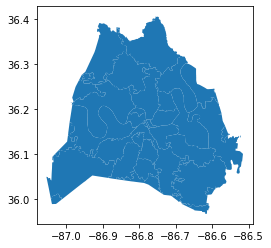

In [31]:
zipcodes.plot();

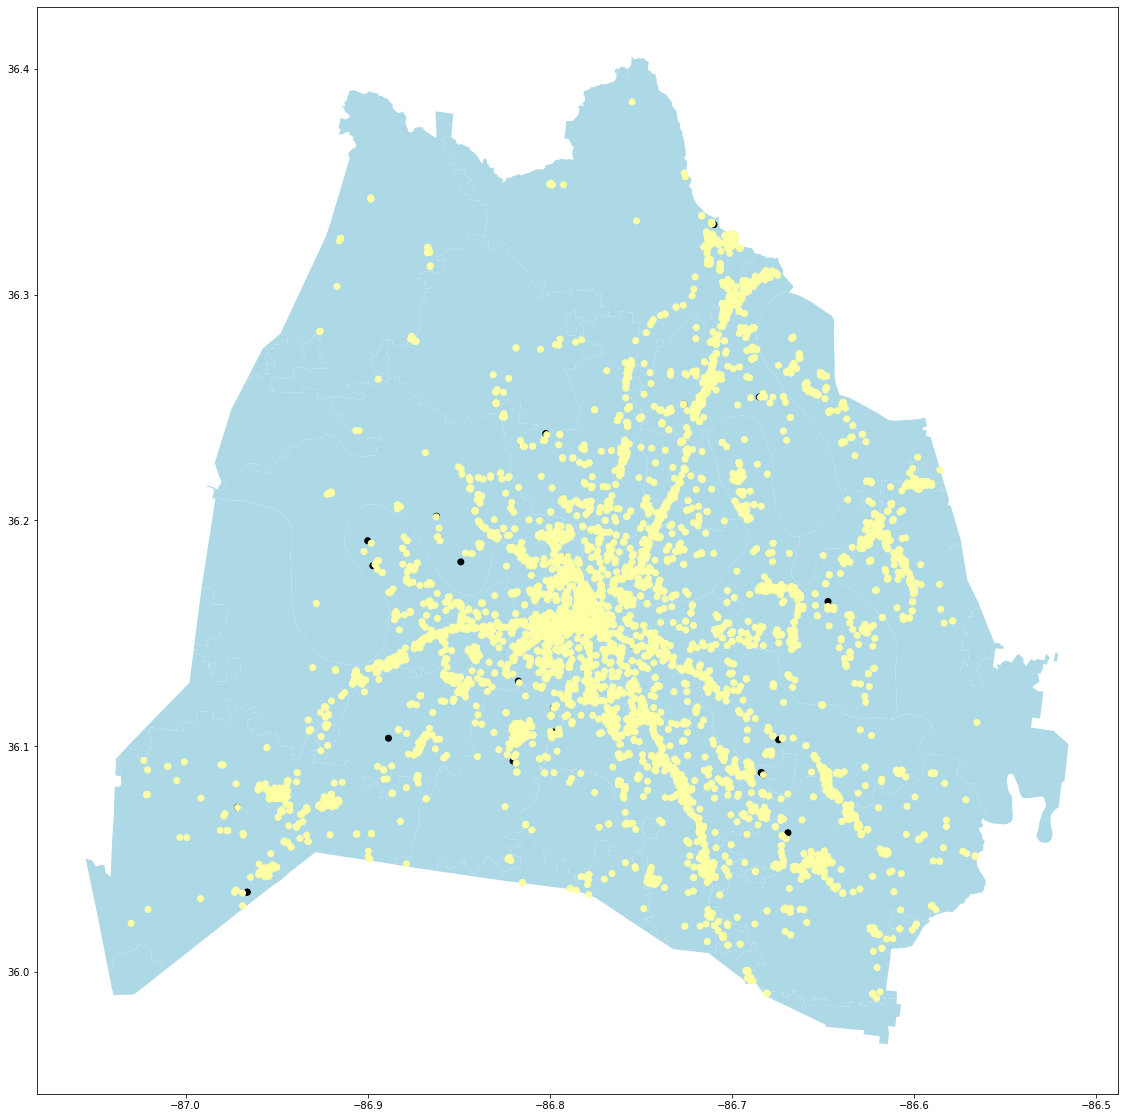

In [32]:
ax = zipcodes.plot(figsize = (20,20), color = 'lightblue')
incidentsZip.plot(ax = ax, column = 'category', cmap='inferno');

In [33]:
polygon37219 = zipcodes.loc[zipcodes['zip'] == '37219']
polygon37219.shape

(1, 3)

In [34]:
center = polygon37219.geometry.centroid

<ipython-input-34-204c95668eea>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37219.geometry.centroid


In [35]:
print(center)

24    POINT (-86.78317 36.16682)
dtype: geometry


In [36]:
map_center = [center.y, center.x]

In [65]:
map_incidents = folium.Map(location = map_center, zoom_start = 12)
marker_cluster = MarkerCluster().add_to(map_incidents)
#map_incidents

In [66]:
folium.GeoJson(zipcodes).add_to(map_incidents)
for row_index, row_values in incidentsZip.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['category'])  + ': ' + str(row_values['name'])
    marker = folium.Marker(
        location = loc,
        popup = pop)
    if row_values['category']=='violation':
        marker = folium.Marker(
        location = loc,
        popup = pop)
        marker.add_to(marker_cluster)
    else:
        folium.Circle(
        radius=50
        , location = loc
        , popup = pop
        , color='crimson'
        , fill=False
        ).add_to(map_incidents)
 #       marker = folium.Marker(
 #       location = loc,
 #       popup = pop,
 #       icon = folium.Icon(color = 'red', icon='dot'#, prefix='fa'
 #       ))
 #       marker.add_to(map_incidents)
        
map_incidents
map_incidents.save('../mapincidents.html')

marker_cluster = MarkerCluster().add_to(map_temp)
for row_index, row_values in violations_geo.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = folium.Popup(html = str(row_values['incident_address']), min_width = 100, max_width = 250)
    marker = folium.Marker(
    location = loc,
    popup = pop, 
    icon = folium.Icon(color = 'red', icon = 'biohazard'))
    marker.add_to(marker_cluster)
    